# CMSE 802 Pre-class assignment: Finite Difference Method 
## Date: 09/04/2018
## Due: 09/05/2018; 10:30 PM
### The goal of this assignment is to get you familar with the concept of the finite difference method and the heat equation. Upon finishing this assignment, you should have some ideas of the finite difference method that will be used in our incoming in-class assignment on Thursday (09/06/2018).

---
### First, let us recall what a derivative is from our high school calculus class. 

Please watch the Youtube video.

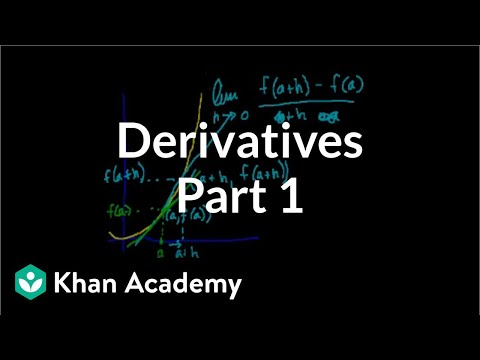

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("rAof9Ld5sOg",width=640,height=360)

So, if the change in x becomes zero (h is infinitesimally small), the slope is the derivative calculated analytically. When the size of h is finite, the derivative is no longer analytical. The way to calculate the derivative is called **the finite difference method**. It is probably the least complicated method in numerically solving partial differential equations.

---
### Finite Difference Method

As in the video, the **Forward differencing** at $x_0$ is

$$ f'(x_0) =  \frac{f(x_0 + h) - f(x_0)}{h}, $$

where the 1st derviative is taken between points $x_0$ and $x_0 + h$. See the figure below for illustration.
 
<img src="DFM_Fig1.jpg",width=400, height=400 />

Similarly, we can take a point at $x_0 - h$ to calculate the **backward differecing**:

$$ f'(x_0) =  \frac{f(x_0) - f(x_0 - h) }{h} .$$


### Task 1
**For funcion $f(x) = x^2$, calculate the value of analytical derivative at $x = 3$, and the values of forward and backward differences at the same point with $h = 0.1$ in the cell below.**

In [5]:
# your code here

# forward method
def f(x):
    return x**2

def f_prime(x):
    return 2*x


print "analytical derivative of x_^2 is", f_prime(3)

x = 3
h = 0.1

f_prime_forward = (f(x+h) - f(x))/h
print "forward difference is", f_prime_forward

# backwawrd method
f_prime_backward = (f(x) - f(x-h))/h
print "backward difference is", f_prime_backward


analytical derivative of x_^2 is 6
forward difference is 6.1
backward difference is 5.9


--- 
You should notice that the numerically calculated derivative is different from the analytical one. There is an error between them. How to quantify the error? Let's start with **Taylor series**.  

A Taylor series is an series expansion of a function about a point. For example, for a function $f(x)$ about a point $x_0$, the Taylor series is 

$$f(x) = f(x_0) + \frac{f'(x_0)}{1!} (x-x_0) + \frac{f''(x_0)}{2!} (x-x_0)^2 + \frac{f'''(x_0)}{3!} (x-x_0)^3 + ......... + \frac{f^{(n)}(x_0)}{n!} (x-x_0)^n +  .........,$$

meaning $f(x)$ is rewritten as its Taylor series in the proximity of $x_0$. Using Taylor series, the value of the function at $x_0 + h$ can be obtained as 

$$f(x_0 + h) = f(x_0) + \frac{f'(x_0)}{1!} h + \frac{f''(x_0)}{2!} h^2 + \frac{f'''(x_0)}{3!} h^3 + ......... + \frac{f^{(n)}(x_0)}{n!} h^n  + .........,$$

where $h$ is a small value.

### First derivative 

We can rearrange the equation such that

$$f(x_0 + h) - f(x_0) = \frac{f'(x_0)}{1!} h + \frac{f''(x_0)}{2!} h^2 + ..... $$

and divide both sides by $h$:

$$ \frac{ f(x_0 + h) - f(x_0)}{h} = \frac{f'(x_0)}{1!} + \frac{f''(x_0)}{2!} h + ..... 
~~~\Longrightarrow~~~ f'(x_0) =  \frac{f(x_0 + h) - f(x_0)}{h} - \mathcal{O}(h)$$

where $\mathcal{O}(h)$ is **the truncation error** in the finite difference method. Because $h$ is a small value, the leading term in the truncation err is 

$$\mathcal{O}(h) = \frac{f''(x_0)}{2!} h + .........$$

Thus, the truncation error is proportional to $h$. Similarly, the truncation error for the backward differencing can be estimated using the following equation:

$$ \frac{ f(x_0) - f(x_0-h)}{h} = \frac{f'(x_0)}{1!} - \frac{f''(x_0)}{2!} h + ..... 
~~~\Longrightarrow~~~ f'(x_0) =  \frac{f(x_0) - f(x_0-h)}{h} + \mathcal{O}(h),$$
which is also proportional to $h$.



The **central differencing** is calculated between $x_0-h$ and $x_0 + h$: 

$$ f'(x_0) =  \frac{f(x_0 + h) - f(x_0-h)}{2h}. $$

See the illustion below.

<img src="DFM_Fig2.jpg",width=400, height=400 />

We can subtract the two Taylor series at $x_0+h$ and $x_0 - h$:

$$f(x_0 + h) = f(x_0) + \frac{f'(x_0)}{1!} h + \frac{f''(x_0)}{2!} h^2 + \frac{f'''(x_0)}{3!} h^3 + ......... + \frac{f^{(n)}(x_0)}{n!} h^n + .........,$$

$$f(x_0 - h) = f(x_0) - \frac{f'(x_0)}{1!} h + \frac{f''(x_0)}{2!} h^2 - \frac{f'''(x_0)}{3!} h^3 + ......... + \frac{f^{(n)}(x_0)}{n!} h^n + .........,$$

to obtain

$$ f(x_0 + h) - f(x_0 - h)  = 2 f'(x_0) h + 2 \frac{f'''(x_0)}{3!} h^3 + ........$$

$$ \Longrightarrow~~~ f'(x_0) = \frac{f(x_0 - h) - f(x_0 + h) }{2h} + \mathcal{O}(h^2).$$

The truncation error is proportional to $h^2$ for the central differencing scheme.

### Task 2
**Calculate the first derivative using the central difference for $f(x)= x^2$ at $x=3$ with $h=0.1$ in the cell below.**

In [7]:
# your code here
f_prime_central = (f(x+h) - f(x-h))/(2*h)
print "central difference of the first derivative is", f_prime_central


central difference of the first derivative is 6.0


---

### Second derivative

For the second derivative in the finite difference method, we sum the two equations below

$$f(x_0 + h) = f(x_0) + \frac{f'(x_0)}{1!} h + \frac{f''(x_0)}{2!} h^2 + \frac{f'''(x_0)}{3!} h^3 + ......... + \frac{f^{(n)}(x_0)}{n!} h^n + .........,$$

$$f(x_0 - h) = f(x_0) - \frac{f'(x_0)}{1!} h + \frac{f''(x_0)}{2!} h^2 - \frac{f'''(x_0)}{3!} h^3 + ......... + \frac{f^{(n)}(x_0)}{n!} h^n + .........,$$

to obtain

$$ f(x_0 + h) - f(x_0) + f(x_0 - h) -  f(x_0) = f''(x_0) h^2 + .........$$


$$ \Longrightarrow~~~ f''(x_0) = \frac{f(x_0 - h) - 2 f(x_0) + f(x_0 + h)}{h^2} + \mathcal{O}(h^?).$$

### Task 3
**What is value of $?$ (the order of the leading term) above in the truncation error of the second derivative in the finite difference method?**

**Your answer:**  2

### Task 4
**Let's calculate the 1st derivative of $f(x) = 3 x^3$ at $x=1.4$ for $h = 0.01, 0.02, 0.04, 0.08, 0.16$, and $0.32$, using the forward, backward and central differencing.  Write your code in the cell below. **

Compare the results to the analytical one: $f'(x) = 9 x^2$. **Plot the error (absolute value) between the finite difference and analytical values for different $h$. Verify whether the error of forward and backward differencing is proportional to $h$, and that of central differencing is proportional to $h^2$.**

forward difference at x = 1.4 for various h are  [ 17.7663  17.8932  18.1488  18.6672  19.7328  21.9792]
backward difference at x = 1.4 for various h are  [ 17.5143  17.3892  17.1408  16.6512  15.7008  13.9152]
central difference at x = 1.4 for various h are  [ 17.6403  17.6412  17.6448  17.6592  17.7168  17.9472]
analytical value is  17.64


Text(0.5,0,u'error')

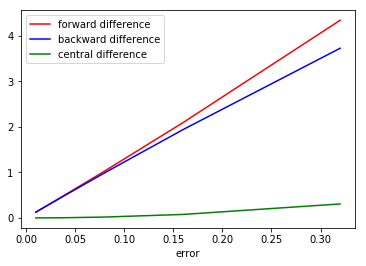

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# your code here
x = 1.4
h = np.array([0.01, 0.02, 0.04, 0.08, 0.16, 0.32])

def f(x):
    return 3*x**3
def f_prime(x):
    return 9*x**2

# forward method
f_prime_forward = (f(x+h) - f(x))/h
print "forward difference at x = 1.4 for various h are ",f_prime_forward

# backward method
f_prime_backward = (f(x) - f(x-h))/h
print "backward difference at x = 1.4 for various h are ",f_prime_backward

# central method
f_prime_central = (f(x+h) - f(x-h))/(2*h)
print "central difference at x = 1.4 for various h are ", f_prime_central

# analytical derivative
print "analytical value is ",f_prime(x)


# error analysis
error_forward = abs(f_prime_forward - f_prime(x))
error_backward = abs(f_prime_backward - f_prime(x))
error_central = abs(f_prime_central - f_prime(x))

plt.plot(h,error_forward,"r",label="forward difference")
plt.plot(h,error_backward,"b",label="backward difference")
plt.plot(h,error_central,"g",label="central difference")
plt.legend()

plt.xlabel("h")
plt.xlabel("error")

### Task 5
We seed 21 equal-spaced points (**grid point for the finite difference method**) between $0$ and $2$: Point 0 at $x=0$, and Point 20 at $x=2$. For the function $f(x) = 3x^3$, let's calculate the 1st derivatives using central differencing scheme, and the second derivatives at points 1 through 19.  

We can use the function "linspace" to set the series of $x$ values (positions of grid points). 

Text(0,0.5,u'f')

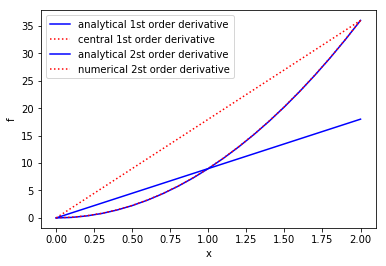

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# seed 21 points in the range between 0 and 2
x = np.linspace(0,2,21)

# the space between grid points
h = x[2]-x[1]

# write your code below
# use loop to calculate the 
def f(x):
    return 3*x**3
def f_prime(x):
    return 9*x**2
def f_doubleprime(x):
    return 9*x

f_prime_central = (f(x+h) - f(x-h))/(2*h)

f_prime_prime   = (f(x-h) - 2*f(x) + f(x+h))/(h**2)

f_prime = f_prime(x)

f_doubleprime = f_doubleprime(x)

# plot the calculated values
plt.plot(x,f_prime,"b",label="analytical 1st order derivative")
plt.plot(x,f_prime_central,"r:",label="central 1st order derivative")
plt.plot(x,f_doubleprime,"b",label="analytical 2st order derivative")
plt.plot(x,f_prime_prime,"r:",label="numerical 2st order derivative")
plt.legend()

plt.xlabel("x")
plt.ylabel("f")



---
## Heat equation
Joseph Fourier was a French mathematician, and served as Napoleon's science advisor. He was asked to investigate the overheat problems of gun barrels. Over years of research, he developed the Fourier's law of heat conduction. The Fourier's law states that the heat flux is proportional to the negative of the gradient of temperature.

$$q = -\kappa \nabla T,$$

where $q$ is the heat flux (thermal energy across an area per time), $\kappa$ is the thermal conductivity, and $T$ is temperature. In 2D or 3D, $q$ is a vector. For 1D case, in the $x$ direction

$$q = -\kappa \frac{\partial T}{\partial x} .$$

Without heat generation, the difference between incoming and outgoing heat fluxes is the thermal energy trapped in a given volume per unit time (thermal energy change rate).  

See the figure below for illustration. 
<img src="ControlVolume.jpg",width=400, height=400 />

The arrows, $q_l$ and $q_r$, are the incoming and outgoing heat fluxes, respectively, and they cross the area $\Delta y \Delta z$. The fluxes multiply with the cross-section area are the thermal energy flow in and out per time.

The temparature of the volume will change proportionally to thermal energy change rate.

$$q_l \Delta y \Delta z - q_r \Delta y \Delta z  = \rho C_p \Delta x \Delta y \Delta z \dot{T},$$

where $\rho$ is the density, and $C_p$ is the heat capacity. The multiplication of $\rho$, $C_p$, and volume is the coefficient that relates the thermal energy change rate and temperature change rate. 



For a small $\Delta x$, $$q_r - q_l = \frac{\partial q}{\partial x} \Delta x.$$ Thus,
$$-\frac{\partial q}{\partial x}  = \rho C_p \frac{\partial T}{\partial t}.$$ 

Recall that $$q = -\kappa \frac{\partial T}{\partial x} ,$$

we obtain the Heat equation in 1D:

$$\rho C_p \frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2}.$$

### Task 6
Let's think about a layer of 0.5 mm in thickness. The influx thermal flux is 195 W/(m$^2$) on one side. The outflux is 180 W/(m$^2$) on the other side. The material's denisty and heat capacity are 4.9 g/cm$^3$ and 200 J/(kg$\cdot$K), respectively. 

Initially, the temperature of the thin layer is 340 K. What is the temperature after 30 minutes? Do a simple calculation to estimate it in the cell below. Make sure you have the units consistent. 

In [1]:
# do your calculation here

q_l     = 195
q_r     = 180
delta_x = 0.0005
rho     = 4.9e3
C_p     = 200
T_0     = 340
delta_t = 1800

# q_r - q_l = dq/dx * delta_x
dq_dx = (q_r - q_l)/delta_x

# -dq/dx = rho*C_p* dT/dt
dT_dt = -dq_dx/(rho*C_p)

T = T_0 + dT_dt * delta_t

# print the value
print (T)

395.102040816


### Assignment wrap-up

What questions do you have, if any, about any of the topics discussed in this assignment.

Put your answer here!

Do you have any further questions or comments about this material?

Put your answer here!

### Congratulations, you're done with your first pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course Desire2Learn web page.  Go to Assessments > Assignments, find the link for Pre-class assignment 20180906, and upload it there.

See you in class!

In [ ]:
Bye!